# High-resolution spectra

Let's set up the atmosphere as in the ["Getting Started"](getting_started.html) example, but this time for high-resolution spectra:

In [1]:
import numpy as np
from petitRADTRANS.radtrans import Radtrans

atmosphere = Radtrans(line_species = ['H2O_main_iso',
                                      'CO_all_iso',
                                      'CH4_main_iso',
                                      'CO2_main_iso',
                                      'Na_allard',
                                      'K'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [2.2, 2.4],
                      mode = 'lbl')

pressures = np.logspace(-10, 2, 130)
atmosphere.setup_opa_structure(pressures)


  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



<div class="alert alert-warning">

**Units in petitRADTRANS:** remember that all units in *petitRADTRANS* are in cgs, **except for pressure**, which is in bars, **and the mean molecular weight (MMW)**, which is in units of atomic mass units.
</div>

Note: now different isotopologues are accessible. We have invoked the high resolution mode by setting the keyword argument `mode` to `"lbl"`. We also loaded a smaller wavelength range, because the high-resolution opacities are pretty big...

We define the planetary radius and gravity at reference pressure $P_0$, as well as the temperatures, abundances and mean molecular weight like before, see ["Getting Started"](getting_started.html) for more information:

In [2]:
import petitRADTRANS.nat_cst as nc
from petitRADTRANS import physics

R_pl = 1.838*nc.r_jup_mean
gravity = 1e1**2.45
P0 = 0.01

kappa_IR = 0.01
gamma = 0.4
T_int = 200.
T_equ = 1500.
temperature = physics.guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)

mass_fractions = {}
mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
mass_fractions['He'] = 0.24 * np.ones_like(temperature)
mass_fractions['H2O_main_iso'] = 0.001 * np.ones_like(temperature)
mass_fractions['CO_all_iso'] = 0.01 * np.ones_like(temperature)
mass_fractions['CO2_main_iso'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4_main_iso'] = 0.000001 * np.ones_like(temperature)
mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
mass_fractions['K'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

<div class="alert alert-warning">

**Abundances in petitRADTRANS:** remember that abundances in pRT are in units of **mass fractions**, not number fractions (aka volume mixing ratio, VMR). You can convert between mass fractions and VMRs by using
\begin{equation}
X_i = \frac{\mu_i}{\mu}n_i,
\end{equation}
where $X_i$ is the mass fraction of species $i$, $\mu_i$ the mass of a single molecule/atom/ion/... of species $i$, $\mu$ is the atmospheric mean molecular weight, and $n_i$ is the VMR of species $i$.

</div>

Now, let's calculate and plot the transmission spectrum:

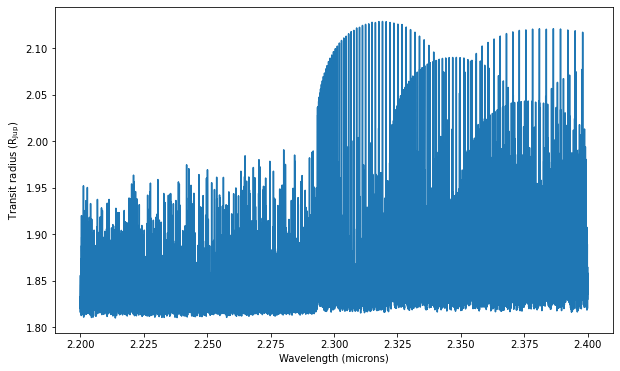

<Figure size 720x432 with 0 Axes>

In [3]:
atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

import pylab as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, atmosphere.transm_rad/nc.r_jup_mean)

plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.show()
plt.clf()

Let's zoom-in a bit, to see individual lines

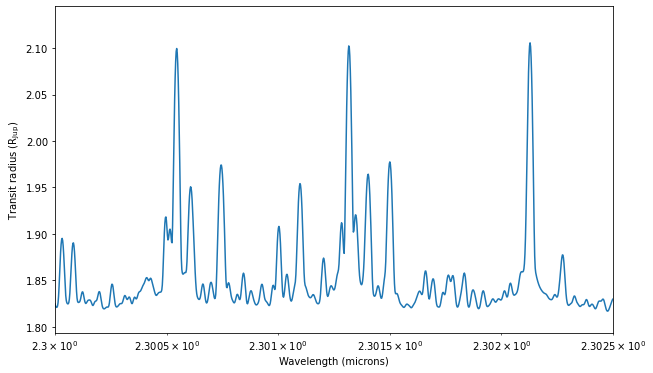

<Figure size 720x432 with 0 Axes>

In [4]:
plt.plot(nc.c/atmosphere.freq/1e-4, atmosphere.transm_rad/nc.r_jup_mean)

plt.xlim([2.3,2.3025])
plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.show()
plt.clf()

As before, the flux can be calculated like this

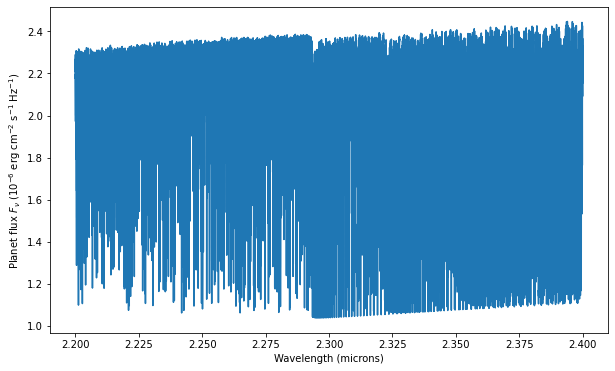

In [5]:
atmosphere.calc_flux(temperature, mass_fractions, gravity, MMW)

plt.plot(nc.c/atmosphere.freq/1e-4, atmosphere.flux/1e-6)

plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Planet flux $F_\nu$ (10$^{-6}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
plt.show()

<div class="alert alert-warning">

**Scattering and petitRADTRANS:** remember that scattering is included for emission spectra in petitRADTRANS only if requested specifically when generating the Radtrans object, as it increases the runtime (see ["Scattering for Emission Spectra"](emis_scat.html) for an example how to do this). We neglect the scattering here.

</div>

Zooming in here as well:

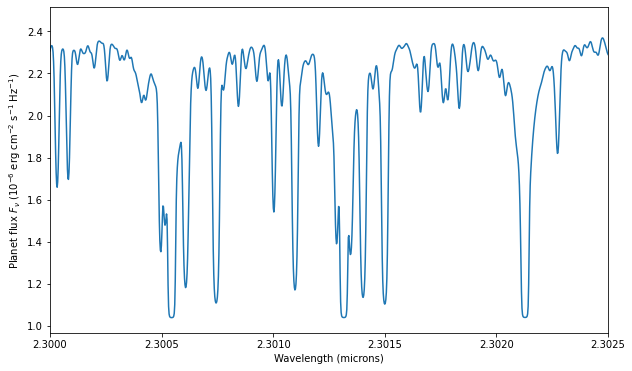

<Figure size 720x432 with 0 Axes>

In [6]:
plt.plot(nc.c/atmosphere.freq/1e-4, atmosphere.flux/1e-6)

plt.xlim([2.3,2.3025])
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Planet flux $F_\nu$ (10$^{-6}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
plt.show()
plt.clf()